<a href="https://colab.research.google.com/github/isb-cgc/Community-Notebooks/blob/boris-dev/RegulomeExplorer/RegulomeExplorer_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regulome Explorer Notebook

This notebook computes significant association scores between pairwise data types available in the PanCancer Atlas dataset of ISB-CGC. The specific statistical tests implmeneted are described ['here'](https://isb-cancer-genomics-cloud.readthedocs.io/en/latest/sections/RegulomeExplorerNotebooks.html#standard-pairwise-statistics),  and a description of the original Regulomen Explorer is avaiable ['here'](https://isb-cancer-genomics-cloud.readthedocs.io/en/latest/sections/RegulomeExplorerNotebooks.html#id5).

The output of the notebook is a table of significacnt associations specified by correltions and p-values. This notebook also performs a more detailed analysis from a user specified pair of features names generating figures and additional statistics.

### Import Python libraries

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from google.cloud import bigquery
import pandas as pd
#import re_module.bq_functions as regulome

### Authentication
The first step is to authorize access to BigQuery and the Google Cloud. For more information see ['Quick Start Guide to ISB-CGC'](https://isb-cancer-genomics-cloud.readthedocs.io/en/latest/sections/HowToGetStartedonISB-CGC.html) and alternative authentication methods can be found [here](https://googleapis.github.io/google-cloud-python/latest/core/auth.html).

In [ ]:
# if you're using Google Colab, authenticate to gcloud with the following
from google.colab import auth
auth.authenticate_user()

# alternatively, use the gcloud SDK
#!gcloud auth application-default login

In [ ]:
# set the google project that will be billed for this notebook's computations
google_project = 'your_project_id'  ## change this

# Initialize a client to access the data within BigQuery
if google_project == 'your_project_id':
    print('Please update the project ID with your Google Cloud Project')
else:
    bqclient = bigquery.Client(google_project)

###If using Colab, download the bq_functions.py file


In [ ]:
%pip install wget
import wget
wget.download('https://raw.githubusercontent.com/isb-cgc/Community-Notebooks/boris-dev/RegulomeExplorer/re_module/bq_functions.py', 'bq_functions.py')
import bq_functions as regulome

### Specify Parameters
The parameters for this experiment are the cancer type (study), a list of genes, a couple of molecular features (), the significance level, and the minimum number of samples required for the statistical analysis.

In [ ]:
[project]  = regulome.WidgetsSelectProject()

In [ ]:
[study, feature1, feature2, gene_names, size, significance] = regulome.makeWidgets( project.value )

### Build the query
The Bigquery query to compute associations between feature 1 and 2 are created using functions in the 'regulome' module. Please refer to our github repository to access the notebooks with description of the methods used for each possible combination of features available in TCGA: https://github.com/isb-cgc/Community-Notebooks/tree/master/RegulomeExplorer.

In [ ]:
LabelList = [ x.strip() for x in gene_names.value.split(',') ]

table1, table2 = regulome.get_feature_tables( project.value, study.value,feature1.value,feature2.value,[],[],[])
str_summarized = regulome.get_summarized_table( project.value, feature1.value, feature2.value, study.value)
str_stats = regulome.get_stat_table(project.value, study.value, feature1.value, feature2.value, size.value, significance.value  )

sql = ( 'WITH' + table1 + ',' + table2 + ',' + str_summarized + str_stats)
#print(sql)

### Run the Bigquery

In [ ]:
bqclient = bigquery.Client(google_project)
df_results = regulome.runQuery ( bqclient, sql, LabelList, [], [], dryRun=False )
df_results


 in runQuery ... 
    this query processed 2173101729 bytes 
    Approx. elpased time : 4258 miliseconds 


,symbol1,symbol2,n,correlation,p_value
0,RAB5A,LCN2,102,0.537066,6.073490e-09
1,RAB5A,AC188616.1,102,-0.510738,4.241111e-08
2,RAB5A,AC022509.1,102,-0.498891,9.652255e-08
3,RAB5A,EMC3,102,0.493246,1.413004e-07
4,RAB5A,ADORA2A-AS1,102,-0.488062,1.993032e-07
...,...,...,...,...,...
2970,RAB5A,Z74021.1,102,-0.254062,9.988763e-03
2971,RAB5A,SLC25A6P5,102,-0.254059,9.989842e-03
2972,RAB5A,LRIG2,102,-0.254045,9.993905e-03
2973,RAB5A,AC013486.1,102,-0.254034,9.997462e-03


## Analyze a pair of labels
From the table above please select a pair of features names to perform a statistical analysis and display the data. You can print the variable 'pair_query' to obtain the query used to retrieve the data.
**pair_query** is the query used to retreive the necessary data for the statistical test.

In [ ]:
[name1 , name2 ] = regulome.makeWidgetsPair(sorted(df_results['symbol1'].unique()), sorted(df_results['symbol2'].unique()))


 in runQuery ... 
    this query processed 2173101729 bytes 
    Approx. elpased time : 823 miliseconds 
SpearmanrResult(correlation=0.4350341107336846, pvalue=4.896564834343943e-06)


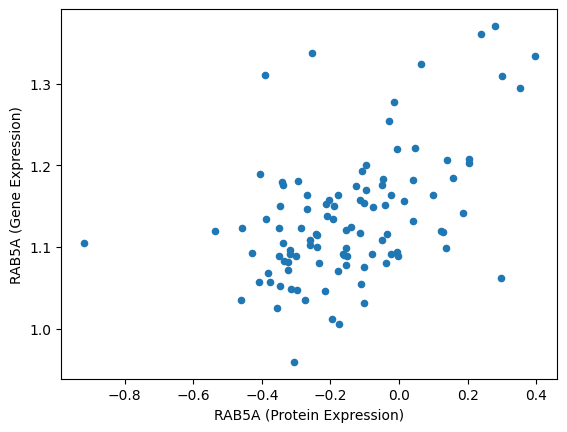

In [ ]:
pair_query = regulome.get_query_pair(project.value, name1.value,name2.value,study.value,[],feature1.value,feature2.value)
df_pair = regulome.runQuery( bqclient, pair_query, LabelList, [], [], dryRun=False )
regulome.plot_statistics_pair(df_pair, project.value, study.value, feature1.value, feature2.value, name1.value, name2.value, size.value)

In [ ]:
df_pair

,data1,data2,ParticipantBarcode
0,-0.3365,1.083320,C3N-00320
1,-0.3010,1.088483,C3N-01178
2,-0.1015,1.076028,C3N-00953
3,-0.2669,1.146875,C3L-00360
4,-0.0956,1.169692,C3L-00011
...,...,...,...
105,-0.3503,1.088597,C3L-00097
106,-0.3413,1.180109,C3L-00817
107,-0.1258,1.174789,C3L-01882
108,-0.3552,1.025687,C3N-01179
